In [2]:
DNA1 = "ATGGCTGAACTG"
DNA2 = 'ATGGCCGAATTG'

In [3]:
codon_table = {
    'GGG':'G','GGA':'G','GGC':'G','GGU':'G',
    'GAG':'E','GAA':'E','GAC':'D','GAU':'D',
    'GCG':'A','GCA':'A','GCC':'A','GCU':'A',
    'GUG':'V','GUA':'V','GUC':'V','GUU':'V',
    'UUU':'F','UUC':'F','UUA':'L','UUG':'L',
    'UCU':'S','UCC':'S','UCA':'S','UCG':'S',
    'UAU':'Y','UAC':'Y','UAA':'stop','UAG':'stop',
    'UGU':'C','UGC':'C','UGA':'stop','UGG':'W',
    'AGG':'R','AGA':'R','AGC':'S','AGU':'S',
    'AAG':'K','AAA':'K','AAC':'N','AAU':'N',
    'ACG':'T','ACA':'T','ACC':'T','ACU':'T',
    'AUG':'M','AUA':'I','AUC':'I','AUU':'I',
    'CGG':'R','CGA':'R','CGC':'R','CGU':'R',
    'CAG':'Q','CAA':'Q','CAC':'H','CAU':'H',
    'CCG':'p','CCA':'p','CCC':'p','CCU':'p',
    'CUU':'L','CUC':'L','CUA':'L','CUG':'L'
}

In [6]:
def complement_seq(dna_seq):
    complement_map = str.maketrans('ATGC','TACG')
    complement = dna_seq.translate(complement_map)
    return complement

compt1 = complement_seq(DNA1)
compt2 = complement_seq(DNA2)

print('complement1: ',compt1)
print('complement2: ',compt2)

complement1:  TACCGACTTGAC
complement2:  TACCGGCTTAAC


In [8]:
def mrna_seq(dna_seq):
    mrna=dna_seq.replace('T','U')
    return mrna

mrna1=mrna_seq(compt1)
mrna2=mrna_seq(compt2)

print('mRNA1: ',mrna1)
print('mRNA2: ',mrna2)

mRNA1:  UACCGACUUGAC
mRNA2:  UACCGGCUUAAC


In [9]:
def codons(mrna_seq):
    codon=[mrna_seq[i:i+3] for i in range(0,len(mrna_seq),3)]
    return codon

codon1=codons(mrna1)
codon2=codons(mrna2)
print('codon1: ',codon1)
print('codon2: ',codon2)

codon1:  ['UAC', 'CGA', 'CUU', 'GAC']
codon2:  ['UAC', 'CGG', 'CUU', 'AAC']


In [13]:
def amino_acid(codons):
    amino = "".join(codon_table.get(codon,"?") for codon in codons)
    return amino

amino1=amino_acid(codon1)
amino2=amino_acid(codon2)
print('amino_acid1: ',amino1)
print('amino_acid2: ',amino2)

amino_acid1:  YRLD
amino_acid2:  YRLN


In [18]:
subsititution_dna = DNA1[:4]+'A'+DNA1[5:]
insertion_dna=DNA1[:4]+'T'+DNA1[4:]
delition_dna=DNA1[:4]+DNA1[5:]
print(DNA1)
print(subsititution_dna)
print(insertion_dna)
print(delition_dna)

ATGGCTGAACTG
ATGGATGAACTG
ATGGTCTGAACTG
ATGGTGAACTG


In [22]:
if len(DNA1)!=len(subsititution_dna):
    print('not equal sequence')

exact_match= sum(1 for a,b in zip(DNA1,subsititution_dna)if a==b)
total_length=min(len(DNA1),len(subsititution_dna))
identity_precentation=exact_match/total_length*100

print('exact match: ',exact_match)
print('total length: ',total_length)
print('identity precentation: ',identity_precentation)

exact match:  11
total length:  12
identity precentation:  91.66666666666666


In [23]:
if len(DNA1)!=len(DNA2):
    print('not equal sequence')

exact_match= sum(1 for a,b in zip(DNA1,DNA2)if a==b)
total_length=min(len(DNA1),len(DNA2))
identity_precentation=exact_match/total_length*100

print('exact match: ',exact_match)
print('total length: ',total_length)
print('identity precentation: ',identity_precentation)

exact match:  10
total length:  12
identity precentation:  83.33333333333334


In [33]:
def motif_find(seq,k):
    motif_array=[]
    for i in range(0,len(seq)-k+1,1):
        motif=seq[i:i+k]
        motif_array.append(motif)

    return motif_array

array=motif_find(DNA1,5)
print(array)

['ATGGC', 'TGGCT', 'GGCTG', 'GCTGA', 'CTGAA', 'TGAAC', 'GAACT', 'AACTG']


In [36]:
from collections import Counter
motif_count = Counter(array)

for motif,count in motif_count.most_common(10):
    print(motif,count)

top_motif=motif_count.most_common(10)
labels = [m for m, c in top_motif]
count = [c for c, c in top_motif]

ATGGC 1
TGGCT 1
GGCTG 1
GCTGA 1
CTGAA 1
TGAAC 1
GAACT 1
AACTG 1


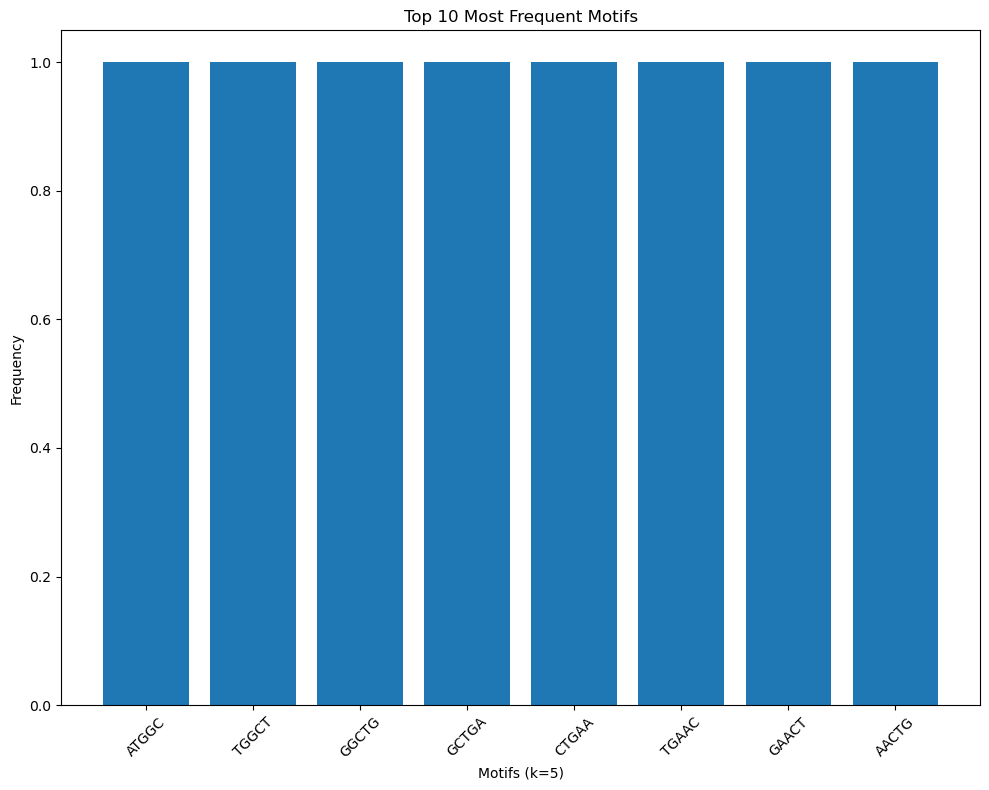

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(labels,count)
plt.xlabel("Motifs (k=5)")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Motifs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()